In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import re
from scipy.stats import skew,norm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,KFold,GridSearchCV


In [5]:
Train = pd.read_csv('./Data/train.csv')
Test = pd.read_csv('./Data/test.csv')
id=Test.PassengerId
Y=Train.Survived

In [6]:
train=pd.concat([Train.drop('Survived',1),Test])

In [7]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train.shape

(1309, 11)

In [9]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.drop(['PassengerId','Ticket'],1,inplace=True)

In [11]:
train['Family_size'] = train['Parch'] + train["SibSp"] + 1

In [12]:
train['Title']=train['Name'].apply(lambda x : re.findall(r'[A-Za-z]+\.',x)[0]).astype(str)

y=(train['Title'].value_counts()).index[4:].values

l=train['Title'].replace(to_replace=y,value='Rare')

train['Title']=l

In [13]:
train['Surname']=train['Name'].apply(lambda x : re.findall(r'[A-Za-z]+\,',x)[0]).astype(str)

In [14]:
train.Cabin.isnull().sum()

1014

In [15]:
train['Cabin']=train['Cabin'].fillna(value="None").apply(lambda x : re.findall(r'[A-Z]+',x)[0]).astype(str)


In [16]:
train['HasCabin']=(train['Cabin']!='N').astype(int)

In [17]:
train['Age']=train['Age'].fillna(value=train.Age.median())

In [18]:
train['Fare']=train['Fare'].fillna(value=train['Fare'].median())

In [19]:
train["Fare"]=np.log1p(train['Fare'])

In [20]:
train['Embarked']=train['Embarked'].fillna(value=train['Embarked'].mode())

In [21]:
train=pd.get_dummies(train)

In [22]:
train=pd.DataFrame(StandardScaler().fit_transform(train),columns=train.columns)

/home/ramanujam/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ramanujam/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
# corr_matrix = train.corr()

In [24]:
# f,ax=plt.subplots(figsize=(12,12))
# sns.heatmap(corr_matrix,annot=True)

In [25]:
sns.violinplot(y=train['Survived'],x=train['Title'])

KeyError: 'Survived'

In [ ]:
sns.countplot(x=train['Title'])

In [26]:
sns.pairplot(train)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f22a3b17a60> (for post_execute):


ValueError: Image size of 396900x396900 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 396900x396900 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 396900x396900 with 1451 Axes>

In [158]:
train_numeric=train.select_dtypes(exclude='object')

In [164]:
skew(train_numeric)

array([ 0.47771747, -0.62948588,  0.50938526,  3.68912768,  2.74448674,
        4.77925329,  2.72284767,  1.29019002])

In [161]:
train_numeric.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size',
       'HasCabin'],
      dtype='object')

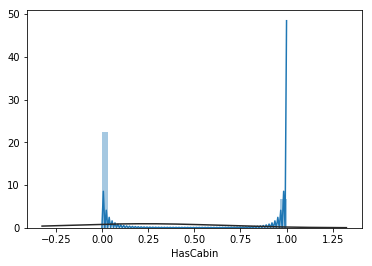

In [168]:
sns.distplot(train['HasCabin'],fit=norm)

In [184]:
train_new=train[:Train.shape[0]]
test_new=train[Train.shape[0]:]

In [185]:
ntrain=train_new.shape[0]
ntest=test_new.shape[0]
seed=0
nfolds=5
kf=KFold(n_splits=nfolds,random_state=seed)        

In [204]:
def give_output(clf,train_new,Y,test_new):
    output_train=np.zeros((ntrain,))
    output_test=np.zeros((ntest,))
    output_test_inter=np.empty((nfolds,ntest))
    for i,(train_index,test_index) in enumerate(kf.split(train_new)):
        tr_x=train_new[train_index]
        tr_y=Y[train_index]
        ts_x=train_new[test_index]
        
        clf.fit(tr_x,tr_y)
        output_train[test_index]=clf.predict(ts_x)
    
        output_test_inter[i,:]=clf.predict(test_new)
    output_test=np.mean(output_test_inter,axis=0)
    return output_train.reshape(-1,1),output_test.reshape(-1,1)


In [188]:
rfc_params={'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 200,}
et_params={'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 300}
gbc_params={'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 200}
ada_params={'learning_rate': 0.75, 'n_estimators': 500}
svc_params={'C': 0.01, 'kernel': 'linear'}
lgc_params={'C': 0.1}

In [200]:
rfc=RandomForestClassifier(**rfc_params)
ada=AdaBoostClassifier(**ada_params)
gbc=GradientBoostingClassifier(**gbc_params)
et=ExtraTreesClassifier(**et_params)
svc=SVC(**svc_params)
lgc=LogisticRegression(**lgc_params)

In [212]:
trainx=train_new.values
testx=test_new.values
y=Y.ravel()

In [213]:
rfc_out_train,rfc_out_test=give_output(rfc,trainx,y,testx)
et_out_train,et_out_test=give_output(et,trainx,y,testx)
gbc_out_train,gbc_out_test=give_output(gbc,trainx,y,testx)
svc_out_train,svc_out_test=give_output(svc,trainx,y,testx)
ada_out_train,ada_out_test=give_output(ada,trainx,y,testx)
lgc_out_train,lgc_out_test=give_output(lgc,trainx,y,testx)

/home/ramanujam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ramanujam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ramanujam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ramanujam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ramanujam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

In [215]:
base_preds_train=pd.DataFrame({'RandomForest':rfc_out_train.ravel(),'ExtraTrees':et_out_train.ravel(),'GradientBoosting':gbc_out_train.ravel(),'SupportVector':svc_out_train.ravel(),'AdaBoost':ada_out_train.ravel(),'Logistic':lgc_out_train.ravel()})

In [219]:
corr_matrix=base_preds_train.corr()

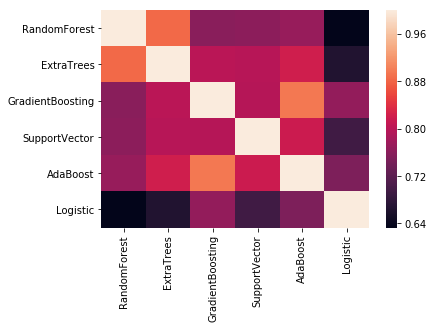

In [220]:
sns.heatmap(corr_matrix)

In [221]:
base_preds_test=pd.DataFrame({'RandomForest':rfc_out_test.ravel(),'ExtraTrees':et_out_test.ravel(),'GradientBoosting':gbc_out_test.ravel(),'SupportVector':svc_out_test.ravel(),'AdaBoost':ada_out_test.ravel(),'Logistic':lgc_out_test.ravel()})

In [242]:
xgc=xgb.XGBClassifier(
n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

In [243]:
xgc.fit(base_preds_train,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.9, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=2, missing=None,
       n_estimators=2000, n_jobs=1, nthread=-1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [244]:
preds=xgc.predict(base_preds_test)

In [245]:
a=pd.DataFrame()

In [246]:
a['PassengerId']=id

In [247]:
a['Survived']=preds

In [248]:
a.to_csv('new.csv',index=False)

In [249]:
a.shape

(418, 2)